<a href="https://www.kaggle.com/code/samudra89/nlp-02-tweet-sentiment-extraction?scriptVersionId=141296802" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Tweet Sentiment Extraction

A sentiment analysis tool is an automated method that extracts valuable insights from customer input, revealing their feelings, opinions, and perspectives. Twitter serves as a specific avenue for assessing public sentiment regarding diverse subjects, items, or services. This type of analysis, known as Twitter sentiment analysis, uses natural language processing (NLP) and machine learning to identify the negative, positive, or neutral emotions present within tweet text. In this analysis, I want to focus on distinguishing the emotional tone expressed in a series of tweets.

The dataset I used for this analysis originates from a Kaggle competition called the "Tweet Sentiment Extraction competition"(https://www.kaggle.com/competitions/tweet-sentiment-extraction/overview). 

This dataset contains roughly 27,500 tweets and is divided into two files: train.csv containing 27,481 rows and test.csv containing 3,534 rows.

The dataset's columns include:

* **textID**: A distinctive identifier for each data row.
* **text**: This column holds the textual content of the tweet.
* **sentiment**: Reflects the sentiment associated with the text (positive/negative/neutral).
* **selected_text**: Comprises phrases or words extracted from the text that strongly represent its sentiment.

In [1]:
# Load the libraries

# utilities
import re
import numpy as np
import pandas as pd
import string
from collections import Counter
#import contractions

# nltk
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import RegexpTokenizer

# visulization
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn
from wordcloud import WordCloud
import seaborn as sns


from sklearn.metrics import confusion_matrix, classification_report


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


/kaggle/input/tweetsentiment/sample_submission.csv
/kaggle/input/tweetsentiment/train.csv
/kaggle/input/tweetsentiment/test.csv


In [2]:
# A contraction is a word made by shortening and combining two words
# I use the following list of contractions, so to replace contractions in tweets as 
contractions = { 
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can`t": "cannot",
"can't've": "cannot have",
"cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn`t": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"didn`t": "did not",
"doesn't": "does not",
"doesn`t": "does not",
"don't": "do not",
"don`t": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"i'd": "i had / i would",
"i`d": "i had / i would",
"i'd've": "i would have",
"i'll": "i shall / i will",
"i'll've": "i shall have / i will have",
"i'm": "i am",
"i`m": "i am",
"i` m": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"it`s": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}


### Load the data

In [3]:
# load the data
test_data=pd.read_csv("/kaggle/input/tweetsentiment/test.csv")
train_data=pd.read_csv("/kaggle/input/tweetsentiment/train.csv")
train_data.head(3)

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative


In [4]:
test_data.head(3)

,textID,text,sentiment
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative


## Exploratory data anlysis

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


### Missing values

In [6]:
np.sum(train_data.isnull().any(axis=1))

1

In [7]:
np.sum(test_data.isnull().any(axis=1))

0

In [8]:
train_data=train_data.dropna()

<AxesSubplot:xlabel='sentiment', ylabel='count'>

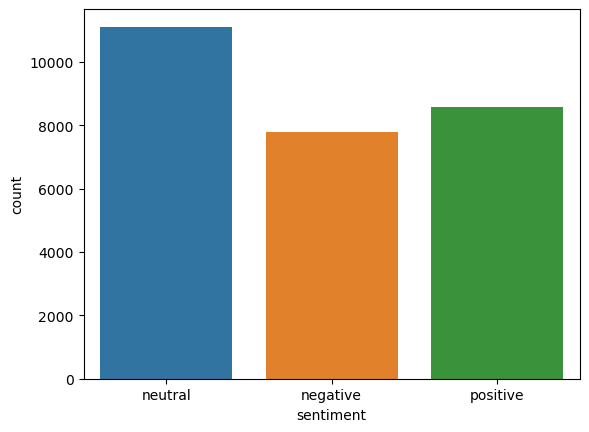

In [9]:
# check for label values, helps to figure out imbalanced classes
sns.countplot(x='sentiment', data=train_data)

In [10]:
#sns.countplot(x='sentiment', data=test_data)

In [11]:
train_data['sentiment'].value_counts(normalize=True)

neutral     0.404549
positive    0.312300
negative    0.283151
Name: sentiment, dtype: float64

As you can see, approximately 40% percent of tweets are neutral. Next, let's see how many number of positive, negative, and neutral tweets are in our training dataset.

In [12]:
# check the number of positive vs. negative tagged sentences
positives = train_data['sentiment'][train_data.sentiment == 'positive']
negatives = train_data['sentiment'][train_data.sentiment == 'negative']
neutral = train_data['sentiment'][train_data.sentiment == 'neutral']
print('number of positve tagged sentences is:  {}'.format(len(positives)))
print('number of negative tagged sentences is: {}'.format(len(negatives)))
print('number of neutral tagged sentences is: {}'.format(len(neutral)))
print('total length of the data is:            {}'.format(train_data.shape[0]))

number of positve tagged sentences is:  8582
number of negative tagged sentences is: 7781
number of neutral tagged sentences is: 11117
total length of the data is:            27480


Text(0.5, 0.98, 'Distribution of number of No: Words in Tweets')

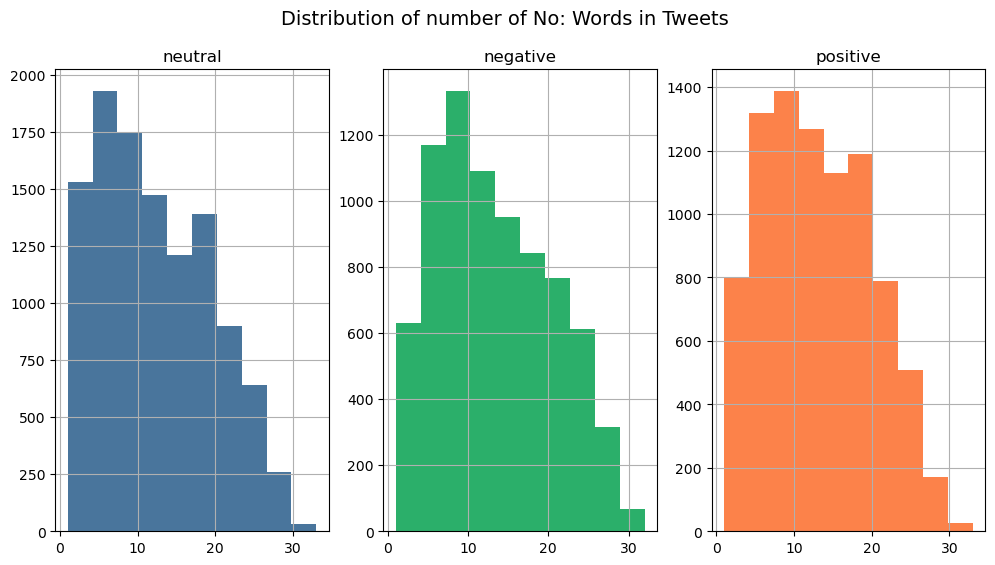

In [13]:
colors=['#49759c','#2baf6a','#fc824a']
sent=train_data.sentiment.unique()
fig,ax= plt.subplots(1,3,figsize=(12,6))
for i in range(0,3):
    train_data[train_data['sentiment']==sent[i]]['text'].str.split().str.len().hist(ax=ax[i],color=colors[i])
    ax[i].set_title(sent[i])
        
fig.suptitle("Distribution of number of No: Words in Tweets", fontsize=14)

The number of words in each tweet may range from 1-30 words overall, while the most frequent number of word choices is between 5-10 words.

In [14]:
# get a word count per sentence column
def word_count(sentence):
    #print(sentence)
    return len(sentence.split())
    
train_data.loc[:,'word count'] = train_data['text'].apply(word_count)
train_data.head(3)

,textID,text,selected_text,sentiment,word count
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,7
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,10
2,088c60f138,my boss is bullying me...,bullying me,negative,5


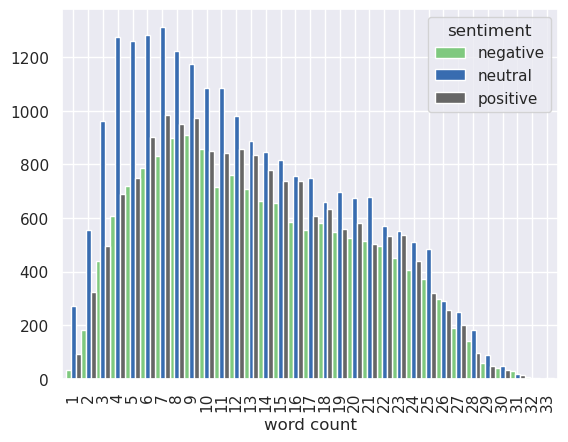

In [15]:
seaborn.set() 
df = train_data[['word count','sentiment']]
df.loc[:,'dummy'] = 2
ag = df.groupby(['word count','sentiment']).sum().unstack()
ag.columns = ag.columns.droplevel()
ag.plot(kind = 'bar', colormap = cm.Accent, width = 1)
plt.show()

This graph shows another view of word distribution across tweets. The X-axis represent the word count and the Y-axis represent the number of tweet. As observed previously, number of words in a tweet varies between 1-30, while many tweets contain 5-10 words.

In [16]:
# get most common words in training dataset
all_words = []

for line in list(train_data['text']):
    words = line.split()
    for word in words:
        all_words.append(word.lower())

Counter(all_words).most_common(10)

[('i', 13065),
 ('to', 9943),
 ('the', 8946),
 ('a', 6684),
 ('my', 5489),
 ('and', 5010),
 ('you', 4201),
 ('is', 3903),
 ('in', 3690),
 ('for', 3635)]

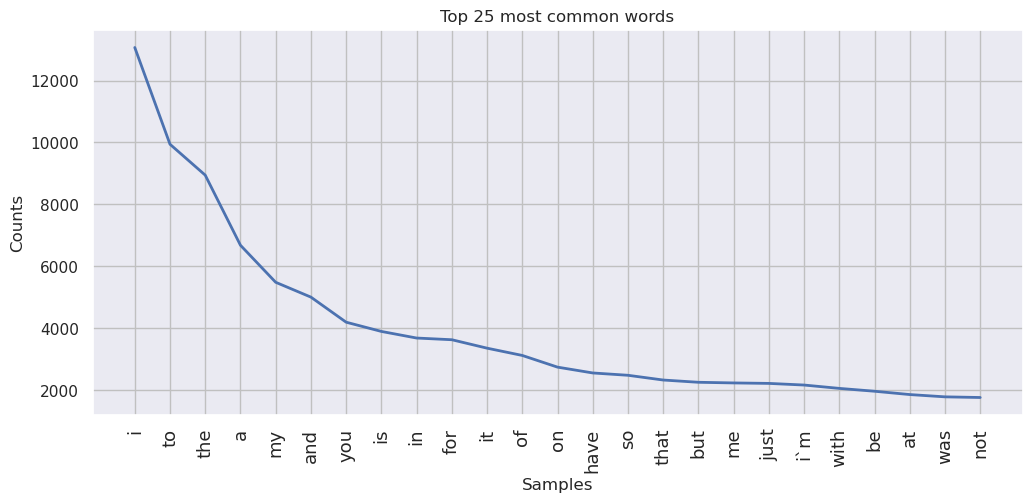

Text(0.5, 1.0, 'log-log plot of words frequency')

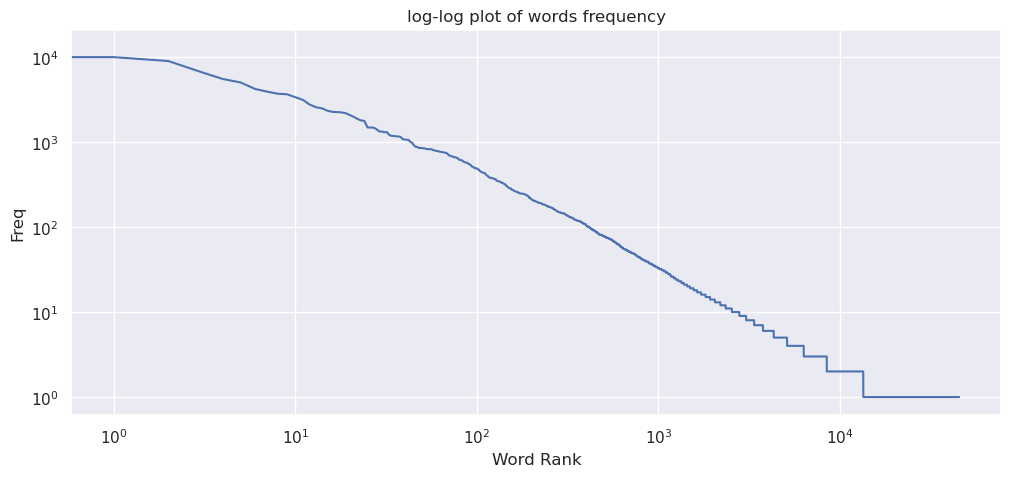

In [17]:
# plot word frequency distribution of first few words
plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_words)
fd.plot(25,cumulative=False)


# log-log plot
word_counts = sorted(Counter(all_words).values(), reverse=True)
plt.figure(figsize=(12,5))
plt.loglog(word_counts, linestyle='-', linewidth=1.5)
plt.ylabel("Freq")
plt.xlabel("Word Rank")
plt.title('log-log plot of words frequency')

As one would have expected the most common words are either pronouns or stop words. I will remove stop words from the tweet text in the data preprocessing step.


## Data preprocessing

In [18]:
# combine test and training data for pre-processing
train_data = pd.concat([train_data.assign(ind="train"),test_data.assign(ind="validation")])
train_data.fillna('', inplace=True)

In [19]:
# convert the data into lower case
train_data.loc[:,'text']=train_data['text'].str.lower()
train_data.loc[:,'selected_text']=train_data['selected_text'].str.lower()

In [20]:
# remove contractions and return whole words
def remove_contractions(text):
    for word in str(text).split():
        if word in contractions:
            text = text.replace(word, contractions[word.lower()])
    return text

train_data['text'] = train_data['text'].apply(lambda text: remove_contractions(text))
train_data['selected_text'] = train_data['selected_text'].apply(lambda text: remove_contractions(text))
train_data['text'].head(3)

0     i had / i would have responded, if i were going
1       sooo sad i will miss you here in san diego!!!
2                           my boss is bullying me...
Name: text, dtype: object

In [21]:
# retrieve the list of stop words provide by the nltk library
stopwords = nltk.corpus.stopwords.words('english')
stopwords.append('im')
list(stopwords)[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [22]:
# remove the stop words from the text
STOPWORDS = set(stopwords)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

train_data['text'] = train_data['text'].apply(lambda text: cleaning_stopwords(text))
train_data['selected_text'] = train_data['selected_text'].apply(lambda text: cleaning_stopwords(text))
train_data['text'].head(3)

0      / would responded, going
1    sooo sad miss san diego!!!
2           boss bullying me...
Name: text, dtype: object

In [23]:
# remove the URLs from the text
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)

train_data['text'] = train_data['text'].apply(lambda x: cleaning_URLs(x))
train_data['selected_text'] = train_data['selected_text'].apply(lambda x: cleaning_URLs(x))
train_data['text'].head(3)

0      / would responded, going
1    sooo sad miss san diego!!!
2           boss bullying me...
Name: text, dtype: object

In [24]:
# remove the punctuations from the text
punctuations_list = string.punctuation

def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

train_data['text'] = train_data['text'].apply(lambda x: cleaning_punctuations(x))
train_data['selected_text'] = train_data['selected_text'].apply(lambda x: cleaning_punctuations(x))
train_data['text'].head(3)

0      would responded going
1    sooo sad miss san diego
2           boss bullying me
Name: text, dtype: object

In [25]:
# cleaning the repeating characters
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)

train_data['text'] = train_data['text'].apply(lambda x: cleaning_repeating_char(x))
train_data['selected_text'] = train_data['selected_text'].apply(lambda x: cleaning_repeating_char(x))
train_data['text'].head(3)

0      would responded going
1    sooo sad miss san diego
2           boss bullying me
Name: text, dtype: object

In [26]:
# remove numbers from the text
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)

train_data['text'] = train_data['text'].apply(lambda x: cleaning_numbers(x))
train_data['selected_text'] = train_data['selected_text'].apply(lambda x: cleaning_numbers(x))
train_data['text'].head(3)

0      would responded going
1    sooo sad miss san diego
2           boss bullying me
Name: text, dtype: object

In [27]:
# remove single characters from the text
def remove_letters(text):
    return ' '.join( [w for w in  str(text).split() if len(w)>1] )


train_data['text'] = train_data['text'].apply(lambda x: remove_letters(x))
train_data['selected_text'] = train_data['selected_text'].apply(lambda x: remove_letters(x))
train_data['text'].head(3)

0      would responded going
1    sooo sad miss san diego
2           boss bullying me
Name: text, dtype: object

For data pre-processing purposes, you can also use python libraries such as Spacy which comes with tools like pre-trained word vectors, lemmatization, stored stopwords, and entity recognition. 

Following the data pre-processing step, now let's see the distribution of words in the dataset again.

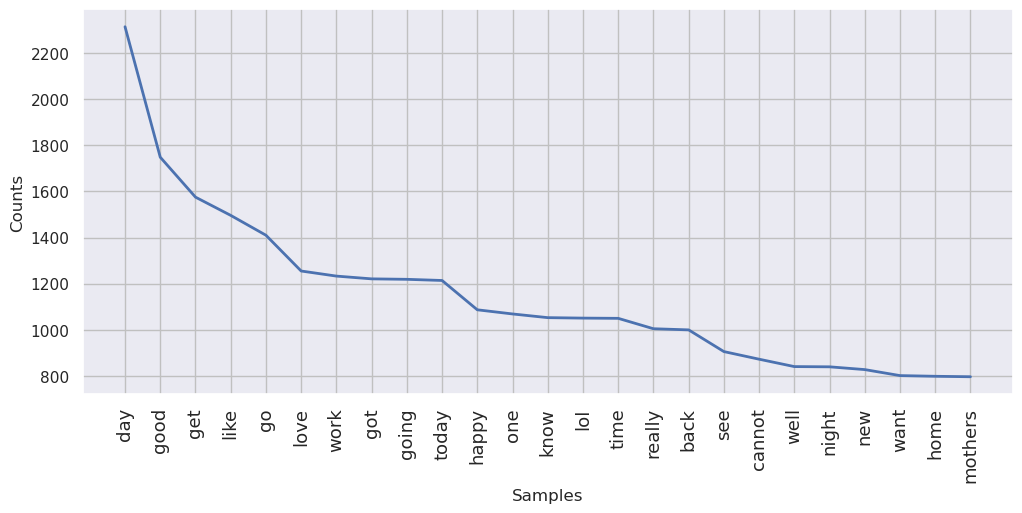

Text(0.5, 0, 'Word Rank')

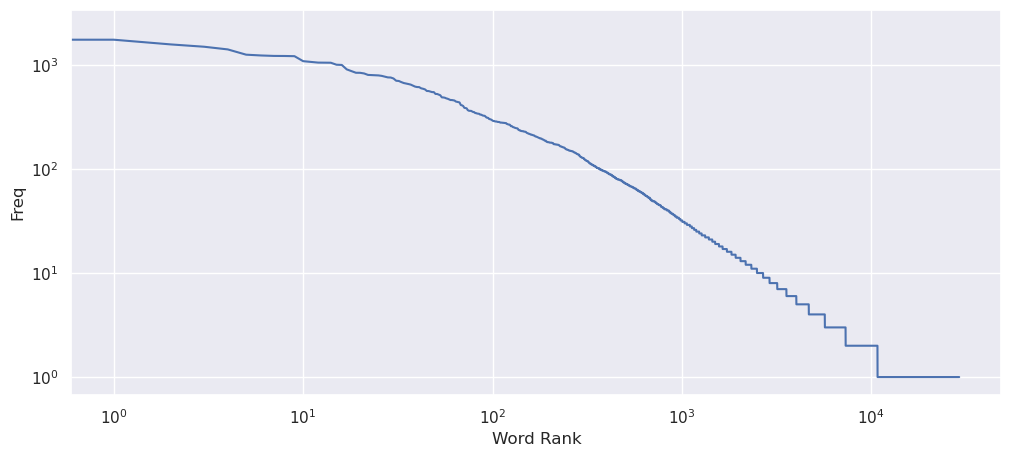

In [28]:
# most common words in twitter dataset
all_words = []
for line in list(train_data['text']):
    words = line.split()
    for word in words:
        all_words.append(word.lower())
        
# plot word frequency distribution of first few words
plt.figure(figsize=(12,5))
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_words)
fd.plot(25,cumulative=False)

# log-log of all words 
word_counts = sorted(Counter(all_words).values(), reverse=True)
plt.figure(figsize=(12,5))
plt.loglog(word_counts, linestyle='-', linewidth=1.5)
plt.ylabel("Freq")
plt.xlabel("Word Rank")

Now, we see a different set of words as mostly frequently occurring words since I have removed the stop words and pronouns.

In [29]:
train_data.head()

,textID,text,selected_text,sentiment,word count,ind
0,cb774db0d1,would responded going,would responded going,neutral,7.0,train
1,549e992a42,sooo sad miss san diego,sooo sad,negative,10.0,train
2,088c60f138,boss bullying me,bullying,negative,5.0,train
3,9642c003ef,interview leave alone,leave alone,negative,5.0,train
4,358bd9e861,sons could put releases already bought,sons,negative,14.0,train


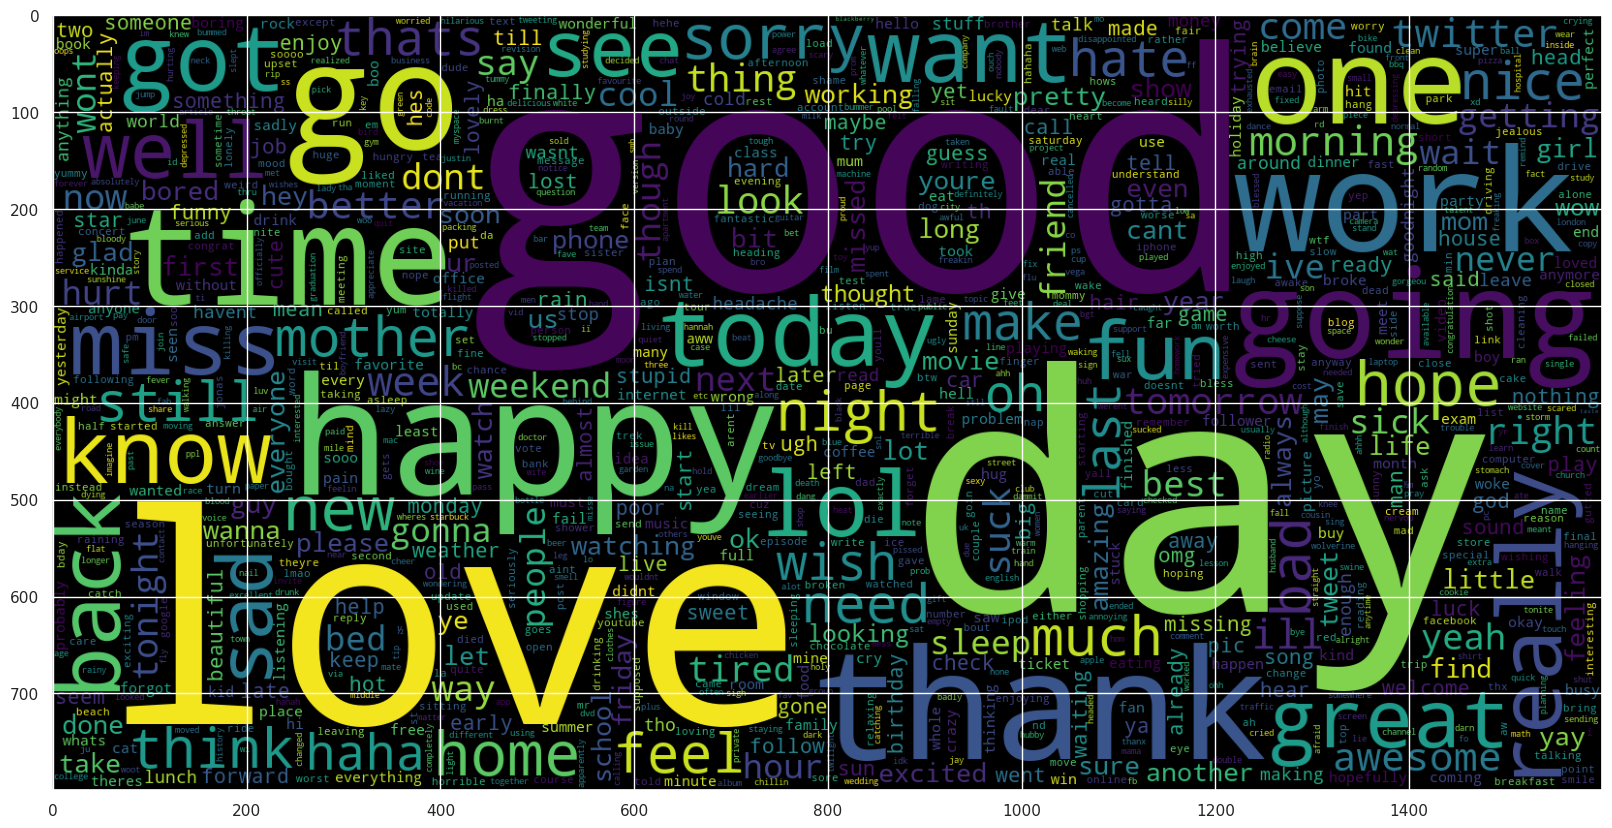

In [30]:
# generate a wordcloud for the selected text
data = train_data['selected_text']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data))
plt.imshow(wc)

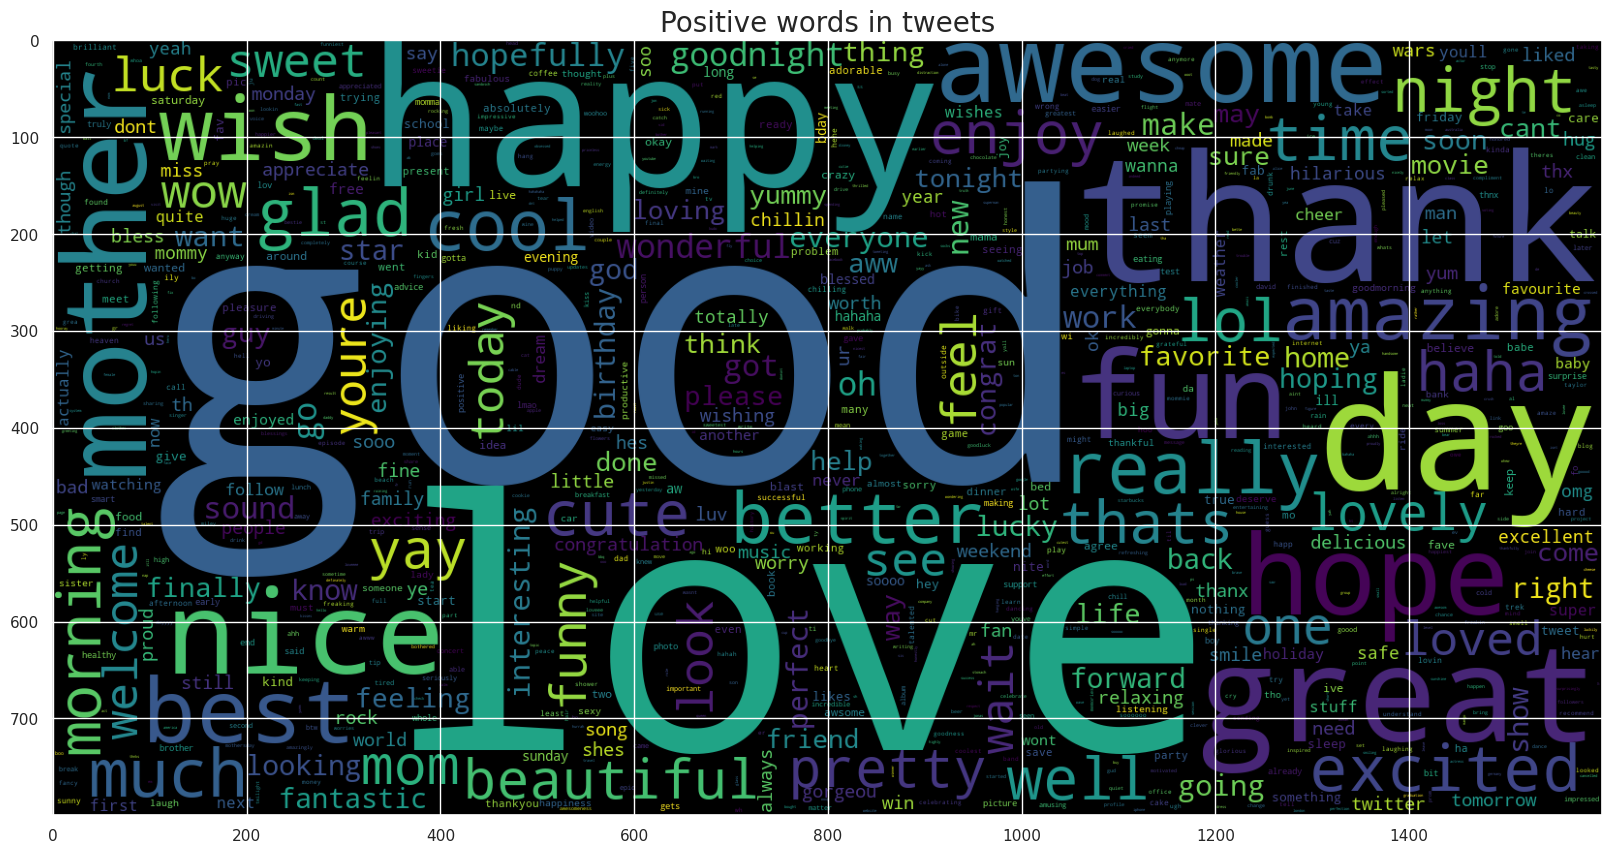

In [31]:
# generate a wordcloud for the selected text with positive sentiment
data = train_data.loc[train_data['sentiment']=='positive']['selected_text']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data))
plt.title('Positive words in tweets', fontsize=20)
plt.imshow(wc)

During the model training phase, I will exclusively focus on text labelled as 'negative' and 'positive'. This approach simplifies result interpretation in binary classification and often enhances model performance. Following this, I will transform the "positive" labels into 1 and the "negative" labels into 0. This conversion facilitates working with arrays for further analysis.

In [32]:
df = train_data.loc[(train_data['sentiment'] != 'neutral') ]

df=df.copy()
df.loc[df['sentiment'] == 'positive','sentiment'] = 1 
df.loc[df['sentiment'] == 'negative','sentiment'] = 0
df.tail(3)

,textID,text,selected_text,sentiment,word count,ind
3531,6332da480c,know mean little dog sinking depression wants ...,,0,,validation
3532,df1baec676,sutra next youtube video gonna about love videos,,1,,validation
3533,469e15c5a8,ssh ang cute ng bby,,1,,validation


### Tokenizing the data

As the next step, I will apply a tokenizer to the full dataset using Keras library preprocessing utilities. The parameter 'max_features' defines the maximum number of words in the tokenized data.

In [33]:
# fitting the tokenizer for text colomn
max_features = 3000
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(df['text'].values)

After the tokenization, I will split back the data into training and testing data.

In [34]:
df_train, df_val = df[df["ind"].eq("train")], df[df["ind"].eq("validation")]
df_val.head(3)

,textID,text,selected_text,sentiment,word count,ind
1,96d74cb729,shanghai also really exciting precisely skyscr...,,1,,validation
2,eee518ae67,recession hit veronique branquinho quit compan...,,0,,validation
3,01082688c6,happy bday,,1,,validation



Then, by applying the above tokenizer to the training and testing data we can vectorize the text of each tweet. We can apply padding to achieve the same length vectors for each tweet, which is important for the model training.

In [35]:
X_train = tokenizer.texts_to_sequences(df_train['text'].values)
X_train = pad_sequences(X_train)

X_val = tokenizer.texts_to_sequences(df_val['text'].values)
X_val = pad_sequences(X_val)

In [36]:
[X_train.shape,X_val.shape]

[(16363, 20), (2104, 17)]

This shows that the training data has 20 features while validation data only includes 17 features. Hence, we need to fill the validation data set with 0 to match with same number of features in the training data. 

In [37]:
X_val = np.lib.pad(X_val, ((0,0),(X_train.shape[1] - X_val.shape[1],0)), 'constant', constant_values=(0))
X_val.shape

(2104, 20)

To obtain the target values, we can apply the get_dummies() method, which creates an array of 0, 1 for each tweet indicating the negative or positive sementic.

In [38]:
Y_train = np.array(pd.get_dummies((df_train['sentiment']).values))
Y_val = np.array(pd.get_dummies((df_val['sentiment']).values))

In [39]:
Y_val

array([[0, 1],
       [1, 0],
       [0, 1],
       ...,
       [1, 0],
       [0, 1],
       [0, 1]], dtype=uint8)

## LSTM model

Long Short-Term Memory (LSTM) networks are a type of recurrent neural network (RNN) architecture designed to handle sequence data, such as time series data or text. LSTMs are particularly well-suited for tasks where the order and context of the data points matter. They were introduced to address some of the limitations of traditional RNNs, which struggle with learning long-range dependencies and capturing information from earlier time steps.

LSTMs were designed to mitigate the vanishing gradient problem, which occurs when gradients become very small as they are backpropagated through many time steps in RNNs. This problem makes it difficult for RNNs to effectively learn dependencies over long sequences. LSTMs achieve this by introducing memory cells and several gating mechanisms that help control the flow of information through the network.

Using a Long Short-Term Memory (LSTM) neural network for sentiment analysis can be quite effective, as LSTMs are well-suited for sequence data like text.

### Model Building

The first step of LSTM model creation is to build an embedding layer. This layer will convert each word into a fixed-length vector. As stated before, 'max_features' is the size of our vocabulary. The parameter 'embed_dim' defines the fixed length that we want for each word when embedding.

In [40]:
max_features = 3000
embed_dim = 128
model = Sequential()
model.add(Embedding(max_features, embed_dim,input_length = X_train.shape[1]))

By adding a spatial drop out  layer to the model, we can avoid overfitting.

In [41]:
model.add(SpatialDropout1D(0.3))

Then we can add the last layer to the model. The parameter 'lstm_out' defines the dimension of the output space. Then we can define our activation function through another dense layer. LSTM requires a sigmoid neural net layer and we can choose the sigmoid activation function for that. Following on we can choose the loss function, optimizeer and the accuracy metric as appropriate. Then, we can fit the model.

In [42]:
lstm_out = 256
model.add(LSTM(lstm_out, dropout=0.5, recurrent_dropout=0.5))

In [43]:
model.add(Dense(2,activation='sigmoid'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 128)           384000    
                                                                 
 spatial_dropout1d (SpatialD  (None, 20, 128)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 256)               394240    
                                                                 
 dense (Dense)               (None, 2)                 514       
                                                                 
Total params: 778,754
Trainable params: 778,754
Non-trainable params: 0
_________________________________________________________________
None


In [44]:
batch_size = 32
model.fit(X_train, Y_train, epochs = 10, batch_size=batch_size, verbose = 2, shuffle=False)

Epoch 1/10
512/512 - 48s - loss: 0.4168 - accuracy: 0.7983 - 48s/epoch - 94ms/step
Epoch 2/10
512/512 - 44s - loss: 0.2938 - accuracy: 0.8737 - 44s/epoch - 87ms/step
Epoch 3/10
512/512 - 44s - loss: 0.2638 - accuracy: 0.8879 - 44s/epoch - 86ms/step
Epoch 4/10
512/512 - 45s - loss: 0.2375 - accuracy: 0.8999 - 45s/epoch - 87ms/step
Epoch 5/10
512/512 - 44s - loss: 0.2191 - accuracy: 0.9108 - 44s/epoch - 86ms/step
Epoch 6/10
512/512 - 45s - loss: 0.1989 - accuracy: 0.9194 - 45s/epoch - 87ms/step
Epoch 7/10
512/512 - 44s - loss: 0.1860 - accuracy: 0.9248 - 44s/epoch - 86ms/step
Epoch 8/10
512/512 - 44s - loss: 0.1676 - accuracy: 0.9315 - 44s/epoch - 86ms/step
Epoch 9/10
512/512 - 45s - loss: 0.1586 - accuracy: 0.9369 - 45s/epoch - 87ms/step
Epoch 10/10
512/512 - 44s - loss: 0.1441 - accuracy: 0.9421 - 44s/epoch - 86ms/step


By looking at the output, we can see that the model keeps improving in each epoch, increasing the accuracy while decreasing the loss. At the end of the 10th epoch, the model returns 94% accuracy for the training data. Then, let's see how the model performs on the testing data.

### Model Evaluation

For model evaluation, I have mainly used the accuracy, f1-score, and confusion matrix on the validation(or test) dataset.

In [45]:
def evaluate_lstm(model, X_test,Y_test):
    
    pos_cnt, neg_cnt, pos_correct, neg_correct = 0, 0, 0, 0
    results = []
    
    for x in range(len(X_test)):
        
        result = model.predict(X_test[x].reshape(1,X_test.shape[1]), batch_size=1,verbose = 3)[0]
        
        if np.argmax(result) == np.argmax(X_test[x]):
            
            if np.argmax(X_test[x]) == 0:
                neg_correct += 1
        else:
            pos_correct += 1
                
        if np.argmax(X_test[x]) == 0:
            neg_cnt += 1
        else:
            pos_cnt += 1

        results.append(np.argmax(result))
        
    Y_test_argmax = np.argmax(Y_test,axis=1)
    Y_test_argmax  = Y_test_argmax.reshape(-1,1)

    results = np.asarray(results)
    results = results.reshape(-1,1)

    conf_matrix = confusion_matrix(Y_test_argmax, results)

    fig = plt.figure(figsize=(6, 6))

    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap = 'GnBu')

    plt.title("Confusion Matrix")
    plt.ylabel('Correct Class')
    plt.xlabel('Predicted class')
    
    print(classification_report(Y_test_argmax, results))
    
    return results, Y_test_argmax, conf_matrix

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1001
           1       0.85      0.89      0.87      1103

    accuracy                           0.86      2104
   macro avg       0.86      0.86      0.86      2104
weighted avg       0.86      0.86      0.86      2104



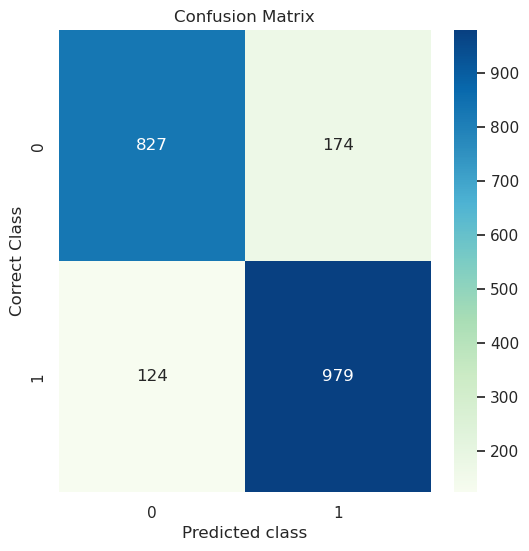

In [46]:
res, Y_argmax, conf_mat = evaluate_lstm(model,X_val,Y_val)


For the testing accuracy, the model returns 98% accuracy and 0.98 F1 Score, which is great! The model has performed well in classifying both negative and positive tweets. Other than the LSTM model we can also explore other models for tweeter sentiment extraction. Some of them are roBERTa model, NER model, LogisticRegression, and multinomial Naive Bayes classifier. 